In [35]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [36]:
matrix = [
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
]

- 1. Превратить граф из ПЗ1-2 во взвешенный, веса - целые числа, распределенные случайным образом

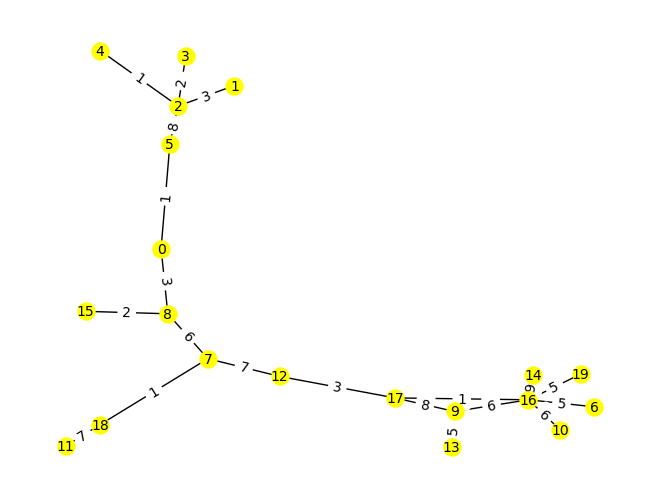

In [37]:
G = nx.Graph()
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] == 1:
            weight = np.random.randint(1, 10)
            G.add_edge(i, j, weight=weight)
pos = nx.spring_layout(G)
edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}
nx.draw(G, pos, with_labels=True, node_size=150, node_color='yellow', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

- 2. Выполнить поиск минимального пути из вершины А в Б (А и Б задаются пользователем) поиском в ширину и в глубину, сделать выводы какой поиск эффективнее. Вывести маршрут и его вес

In [38]:
def shortest_path(graph, start, end):
        path = nx.shortest_path(graph, source=start, target=end, weight='weight')
        length = nx.shortest_path_length(graph, source=start, target=end, weight='weight')
        return path, length
start_node = int(input("Введите вершину А: "))
end_node = int(input("Введите вершину Б: "))
path, length = shortest_path(G, start_node, end_node)
print(f"Минимальный путь поиска в глубину: {path}")
print(f"Вес: {length}")

Введите вершину А: 1
Введите вершину Б: 11
Минимальный путь поиска в глубину: [1, 2, 5, 0, 8, 7, 18, 11]
Вес: 29


- 3. Выполнить поиск всех путей из А в Б, вывести маршруты и их веса

In [39]:
def find_all_paths(graph, start, end):
    all_paths = list(nx.all_simple_paths(graph, source=start, target=end))
    return all_paths
def sum(graph, path):
    cost = 0
    for i in range(len(path) - 1):
        cost += graph[path[i]][path[i+1]]['weight']
    return cost
start_node = int(input("Введите вершину А: "))
end_node = int(input("Введите вершину Б: "))
all_paths = find_all_paths(G, start_node, end_node)
for path in all_paths:
    path_cost = sum(G, path)
    print(f"Путь: {path}, Вес: {path_cost}")

Введите вершину А: 1
Введите вершину Б: 19
Путь: [1, 2, 5, 0, 8, 7, 12, 17, 9, 16, 19], Вес: 50
Путь: [1, 2, 5, 0, 8, 7, 12, 17, 16, 19], Вес: 37


- 4. Пользуясь сервисом https://programforyou.ru/graph-redactor построить сетевой граф из 20 вершин и проделать п 1-3

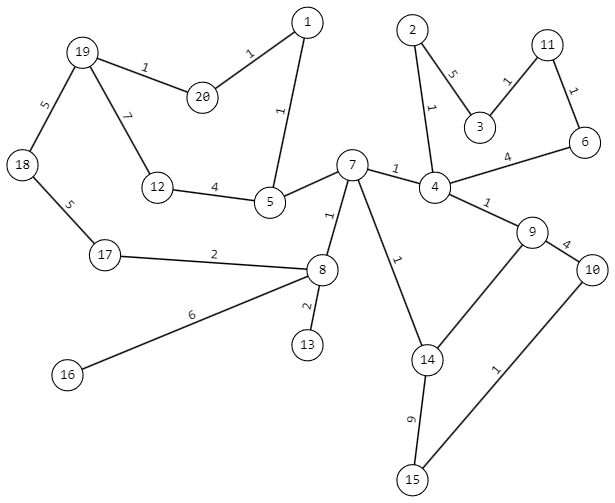

Создание матрицы

In [40]:
matrix=[
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 4, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 6, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0],
[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 5, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]

Взвешенный граф

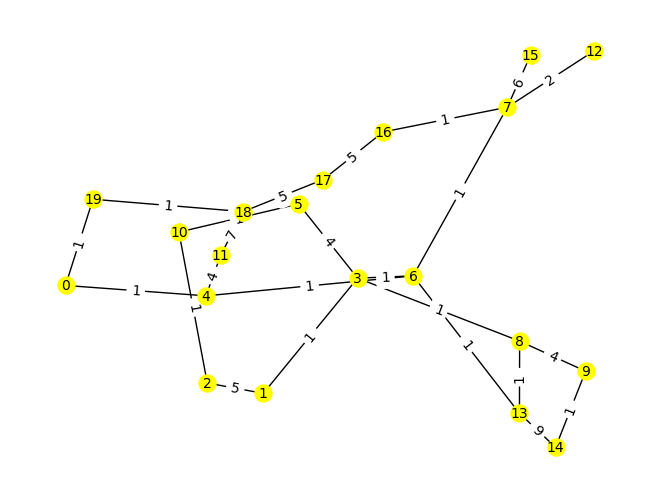

In [43]:
G = nx.Graph()
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        if matrix[i][j] != 0:
            weight = matrix[i][j]
            G.add_edge(i, j, weight=weight)
pos = nx.spring_layout(G)
edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}
nx.draw(G, pos, with_labels=True, node_size=150, node_color='yellow', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

Поиск кратчайшего пути из А в Б:

In [48]:
start_node = int(input("Введите вершину А: "))
end_node = int(input("Введите вершину Б: "))
path, length = shortest_path(G, start_node, end_node)
print(f"Минимальный путь поиска в глубину: {path}")
print(f"Вес: {length}")

Введите вершину А: 1
Введите вершину Б: 19
Минимальный путь поиска в глубину: [1, 3, 6, 4, 0, 19]
Вес: 5


Поиск всех путей из А в Б:

In [49]:
start_node = int(input("Введите вершину А: "))
end_node = int(input("Введите вершину Б: "))
all_paths = find_all_paths(G, start_node, end_node)
for path in all_paths:
    path_cost = sum(G, path)
    print(f"Путь: {path}, Вес: {path_cost}")

Введите вершину А: 1
Введите вершину Б: 19
Путь: [1, 2, 10, 5, 3, 6, 4, 0, 19], Вес: 15
Путь: [1, 2, 10, 5, 3, 6, 4, 11, 18, 19], Вес: 25
Путь: [1, 2, 10, 5, 3, 6, 7, 16, 17, 18, 11, 4, 0, 19], Вес: 37
Путь: [1, 2, 10, 5, 3, 6, 7, 16, 17, 18, 19], Вес: 25
Путь: [1, 2, 10, 5, 3, 8, 9, 14, 13, 6, 4, 0, 19], Вес: 30
Путь: [1, 2, 10, 5, 3, 8, 9, 14, 13, 6, 4, 11, 18, 19], Вес: 40
Путь: [1, 2, 10, 5, 3, 8, 9, 14, 13, 6, 7, 16, 17, 18, 11, 4, 0, 19], Вес: 52
Путь: [1, 2, 10, 5, 3, 8, 9, 14, 13, 6, 7, 16, 17, 18, 19], Вес: 40
Путь: [1, 2, 10, 5, 3, 8, 13, 6, 4, 0, 19], Вес: 17
Путь: [1, 2, 10, 5, 3, 8, 13, 6, 4, 11, 18, 19], Вес: 27
Путь: [1, 2, 10, 5, 3, 8, 13, 6, 7, 16, 17, 18, 11, 4, 0, 19], Вес: 39
Путь: [1, 2, 10, 5, 3, 8, 13, 6, 7, 16, 17, 18, 19], Вес: 27
Путь: [1, 3, 6, 4, 0, 19], Вес: 5
Путь: [1, 3, 6, 4, 11, 18, 19], Вес: 15
Путь: [1, 3, 6, 7, 16, 17, 18, 11, 4, 0, 19], Вес: 27
Путь: [1, 3, 6, 7, 16, 17, 18, 19], Вес: 15
Путь: [1, 3, 8, 9, 14, 13, 6, 4, 0, 19], Вес: 20
Путь: [1, 3, 